In [1]:
import pandas as pd

In [2]:
# Function to merge evaluation and answers files, add course and model columns, and save the result
def process_files_for_model_course(base_path, model_name, course_name):
    # Read the evaluation and answers files
    if model_name == "gpt-4o":
        eval_file_path = f"{base_path}{model_name}_evaluation_{course_name}.csv"
        answers_file_path = f"{base_path}{model_name}_answers_{course_name}.csv"
    else:
        eval_file_path = f"{base_path}{model_name}_evaluation_{course_name}_completed.csv"
        answers_file_path = f"{base_path}{model_name}_answers_{course_name}_completed.csv"
    
    eval_df = pd.read_csv(eval_file_path)
    answers_df = pd.read_csv(answers_file_path)
    
    # Merge the DataFrames on 'student', 'explainer', and 'strategy', using suffixes to differentiate columns
    merged_df = pd.merge(eval_df, answers_df, on=['student', 'explainer', 'strategy'], how='outer', suffixes=('_eval', '_answers'))
    
    # Select columns: keep original columns from the "answers" file or non-overlapping ones
    columns_to_keep = [col for col in merged_df.columns if not col.endswith('_eval')]
    columns_to_rename = {col: col.replace('_answers', '') for col in columns_to_keep if col.endswith('_answers')}
    
    # Rename the selected columns
    merged_df = merged_df[columns_to_keep].rename(columns=columns_to_rename)

    # Add the 'course' and 'model' columns
    merged_df['course'] = course_name
    merged_df['model'] = model_name
    
    # Save the merged DataFrame to a new file
    output_file_path = f"{base_path}{model_name}_merged_{course_name}.csv"
    merged_df.to_csv(output_file_path, index=False)
    
    print(f"Processed and saved: {output_file_path}")

In [3]:
# Define the courses and models
courses = ["dsp_001", "villesafricaines_001", "geomatique_003"]
models = ["meta-llama-3-70b-instruct", "gpt-4o", "gemma2-9b-it"]

# Base path for the files
base_path = "data/final_results/"

In [4]:
# Loop over each combination of model and course
for model_name in models:
    for course_name in courses:
        process_files_for_model_course(base_path, model_name, course_name)

print("All files processed and saved.")

Processed and saved: data/final_results/meta-llama-3-70b-instruct_merged_dsp_001.csv
Processed and saved: data/final_results/meta-llama-3-70b-instruct_merged_villesafricaines_001.csv
Processed and saved: data/final_results/meta-llama-3-70b-instruct_merged_geomatique_003.csv
Processed and saved: data/final_results/gpt-4o_merged_dsp_001.csv
Processed and saved: data/final_results/gpt-4o_merged_villesafricaines_001.csv
Processed and saved: data/final_results/gpt-4o_merged_geomatique_003.csv
Processed and saved: data/final_results/gemma2-9b-it_merged_dsp_001.csv
Processed and saved: data/final_results/gemma2-9b-it_merged_villesafricaines_001.csv
Processed and saved: data/final_results/gemma2-9b-it_merged_geomatique_003.csv
All files processed and saved.


In [5]:
test=pd.read_csv("data/final_results/meta-llama-3-70b-instruct_merged_geomatique_003.csv")
test.drop('Unnamed: 0', axis=1, inplace=True)


test.to_csv("data/final_results/meta-llama-3-70b-instruct_merged_geomatique_003.csv", index=False)

In [6]:
# Loop over each combination of model and course to check the number of columns
for model_name in models:
    for course_name in courses:
        file_path = f"{base_path}{model_name}_merged_{course_name}.csv"
        df = pd.read_csv(file_path)
        
        # Print the number of columns and column names
        print(f"File: {file_path}")
        print(f"Number of columns: {len(df.columns)}")
        print(f"Column names: {list(df.columns)}\n")

File: data/final_results/meta-llama-3-70b-instruct_merged_dsp_001.csv
Number of columns: 21
Column names: ['student', 'explainer', 'strategy', 'evaluation_prompt', 'evaluation_answer1', 'question_0', 'question_1', 'question_2', 'question_3', 'question_4', 'question_5', 'question_6', 'question_7', 'question_8', 'yes_percentage', 'first_prompt', 'second_prompt', 'response1', 'response2', 'course', 'model']

File: data/final_results/meta-llama-3-70b-instruct_merged_villesafricaines_001.csv
Number of columns: 21
Column names: ['student', 'explainer', 'strategy', 'evaluation_prompt', 'evaluation_answer1', 'question_0', 'question_1', 'question_2', 'question_3', 'question_4', 'question_5', 'question_6', 'question_7', 'question_8', 'yes_percentage', 'first_prompt', 'second_prompt', 'response1', 'response2', 'course', 'model']

File: data/final_results/meta-llama-3-70b-instruct_merged_geomatique_003.csv
Number of columns: 21
Column names: ['student', 'explainer', 'strategy', 'evaluation_prompt'

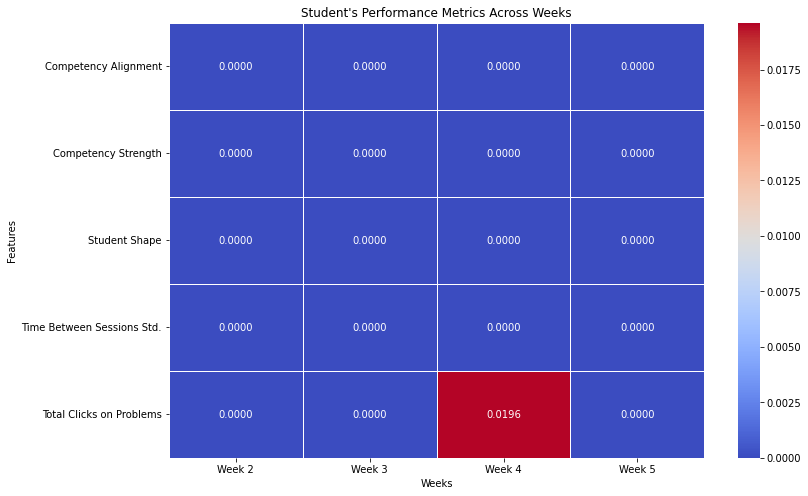

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data based on the provided report
data = {
    "Week 2": [0.0, 0.0, 0.0, 0.0, 0.0],
    "Week 3": [0.0, 0.0, 0.0, 0.0, 0.0],
    "Week 4": [0.0, 0.0, 0.0, 0.0, 0.0196],
    "Week 5": [0.0, 0.0, 0.0, 0.0, 0.0],
}

features = [
    "Competency Alignment",
    "Competency Strength",
    "Student Shape",
    "Time Between Sessions Std.",
    "Total Clicks on Problems"
]

# Create a DataFrame
df = pd.DataFrame(data, index=features)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap="coolwarm", cbar=True, fmt=".4f", linewidths=0.5)
plt.title("Student's Performance Metrics Across Weeks")
plt.xlabel("Weeks")
plt.ylabel("Features")
plt.show()


In [7]:
# List to store dataframes for combining
dfs = []

# Loop over each combination of model and course to read the processed files
for model_name in models:
    for course_name in courses:
        file_path = f"{base_path}{model_name}_merged_{course_name}.csv"
        df = pd.read_csv(file_path)
        
        # Check if all files have the same columns
        if len(dfs) > 0:  # if there are already dataframes in the list
            if not all(df.columns == dfs[0].columns):
                raise ValueError(f"File {file_path} does not have the same columns as other files.")
        
        dfs.append(df)

# Combine all the dataframes vertically
combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined dataframe to a new CSV file
combined_file_path = f"{base_path}llm_for_xai_results.csv"
combined_df.to_csv(combined_file_path, index=False)

print(f"All files combined and saved to: {combined_file_path}")

All files combined and saved to: data/final_results/llm_for_xai_results.csv


In [8]:
base_path = "data/final_results/"
combined_file_path = f"{base_path}llm_for_xai_results.csv"
df=pd.read_csv(combined_file_path)
df

,student,explainer,strategy,evaluation_prompt,evaluation_answer1,question_0,question_1,question_2,question_3,question_4,...,question_6,question_7,question_8,yes_percentage,first_prompt,second_prompt,response1,response2,course,model
0,23,LIME,relevance_selection,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, NO, YES, YES, YES, NO]",1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,NaN,75.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nReport: Key Insights for the Student's Lea...,\n\nWhere Am I Going?\nYou're doing well in th...,dsp_001,meta-llama-3-70b-instruct
1,23,LIME,abnormal_conditions,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, NO, YES, YES, YES, YES, YES]",1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,88.888889,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nReport: Identifying Key Insights for a Str...,\n\nHere's a shorter version of the report usi...,dsp_001,meta-llama-3-70b-instruct
2,23,LIME,pearl_explanation,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES, YES, YES, YES]",1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,100.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nReport: Identifying Key Insights from Mode...,\n\nHere's a shorter version of the report usi...,dsp_001,meta-llama-3-70b-instruct
3,23,LIME,necessity_robustness_selection,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, NO, YES, YES, YES]",1.0,1.0,1.0,0.0,1.0,...,1.0,NaN,NaN,85.714286,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nReport: Insights into Student Behavior and...,\n\nHere's a shorter version of the report usi...,dsp_001,meta-llama-3-70b-instruct
4,23,LIME,contrastive_explanation,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES, YES, YES, YES, YES]",1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,100.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\n**Contrastive Explanation Report**\n\n**Ta...,\n\nHere is a shorter version of the report us...,dsp_001,meta-llama-3-70b-instruct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,326,CEM,necessity_robustness_selection,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, NO, YES, YES, YES]",1.0,1.0,1.0,0.0,1.0,...,1.0,NaN,NaN,85.714286,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",## Analyzing Student Performance in Éléments ...,You're doing well in the course so far! The m...,geomatique_003,gemma2-9b-it
21596,326,CEM,contrastive_explanation,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES, YES, YES, YES, YES]",1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,100.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",## Contrastive Explanation for Student Perform...,You're doing well in the course so far! You're...,geomatique_003,gemma2-9b-it
21597,326,CEM,base_contrastive_explanation,Human: \n Based on the provided Input (if ...,"[YES, NO, YES, YES, YES, YES, YES, NO]",1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,NaN,75.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",## Contrastive Explanation Report: Student Per...,"Right now, the model sees you as being on trac...",geomatique_003,gemma2-9b-it
21598,326,CEM,statistical_relevance,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES]",1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,100.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",## Student Performance Analysis: Éléments de G...,You're doing well in the course so far! Based...,geomatique_003,gemma2-9b-it


In [9]:
df = df[~((df['strategy'] == 'chain_of_thought') & (df['model'] != 'gpt-4o'))]
df

,student,explainer,strategy,evaluation_prompt,evaluation_answer1,question_0,question_1,question_2,question_3,question_4,...,question_6,question_7,question_8,yes_percentage,first_prompt,second_prompt,response1,response2,course,model
0,23,LIME,relevance_selection,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, NO, YES, YES, YES, NO]",1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,NaN,75.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nReport: Key Insights for the Student's Lea...,\n\nWhere Am I Going?\nYou're doing well in th...,dsp_001,meta-llama-3-70b-instruct
1,23,LIME,abnormal_conditions,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, NO, YES, YES, YES, YES, YES]",1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,88.888889,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nReport: Identifying Key Insights for a Str...,\n\nHere's a shorter version of the report usi...,dsp_001,meta-llama-3-70b-instruct
2,23,LIME,pearl_explanation,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES, YES, YES, YES]",1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,100.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nReport: Identifying Key Insights from Mode...,\n\nHere's a shorter version of the report usi...,dsp_001,meta-llama-3-70b-instruct
3,23,LIME,necessity_robustness_selection,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, NO, YES, YES, YES]",1.0,1.0,1.0,0.0,1.0,...,1.0,NaN,NaN,85.714286,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nReport: Insights into Student Behavior and...,\n\nHere's a shorter version of the report usi...,dsp_001,meta-llama-3-70b-instruct
4,23,LIME,contrastive_explanation,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES, YES, YES, YES, YES]",1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,100.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\n**Contrastive Explanation Report**\n\n**Ta...,\n\nHere is a shorter version of the report us...,dsp_001,meta-llama-3-70b-instruct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21594,326,CEM,pearl_explanation,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES, YES, NO, YES]",1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,NaN,87.500000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...","## Analyzing Student Performance in ""Éléments...",You're doing a great job engaging with the cou...,geomatique_003,gemma2-9b-it
21595,326,CEM,necessity_robustness_selection,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, NO, YES, YES, YES]",1.0,1.0,1.0,0.0,1.0,...,1.0,NaN,NaN,85.714286,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",## Analyzing Student Performance in Éléments ...,You're doing well in the course so far! The m...,geomatique_003,gemma2-9b-it
21596,326,CEM,contrastive_explanation,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES, YES, YES, YES, YES]",1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,100.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",## Contrastive Explanation for Student Perform...,You're doing well in the course so far! You're...,geomatique_003,gemma2-9b-it
21597,326,CEM,base_contrastive_explanation,Human: \n Based on the provided Input (if ...,"[YES, NO, YES, YES, YES, YES, YES, NO]",1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,NaN,75.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",## Contrastive Explanation Report: Student Per...,"Right now, the model sees you as being on trac...",geomatique_003,gemma2-9b-it


In [10]:
cot_answers=pd.read_csv("data/final_results/cot_evaluation_fix.csv")
cot_answers

,student,explainer,strategy,evaluation_prompt,evaluation_answer1,question_0,question_1,question_2,question_3,question_4,...,question_6,question_7,question_8,yes_percentage,first_prompt,second_prompt,response1,response2,course,model
0,1,CEM,chain_of_thought,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, NO, YES]",1,1,1,0,1,...,NaN,NaN,NaN,80.0,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nBased on the model prediction and the feat...,\n\nHere's a shorter version of the report usi...,dsp_001,meta-llama-3-70b-instruct
1,1,LIME,chain_of_thought,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, NO, NO]",1,1,1,0,0,...,NaN,NaN,NaN,60.0,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nBased on the model prediction and feature ...,\n\nHere is a shorter version of the report us...,dsp_001,meta-llama-3-70b-instruct
2,1,MC-LIME,chain_of_thought,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, NO, NO]",1,1,1,0,0,...,NaN,NaN,NaN,60.0,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nBased on the model prediction and the feat...,\n\nHere's a shorter version of the report usi...,dsp_001,meta-llama-3-70b-instruct
3,12,CEM,chain_of_thought,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, NO, YES]",1,1,1,0,1,...,NaN,NaN,NaN,80.0,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nReport: Analyzing Student Behavior to Faci...,\n\nHere's a shorter version of the report usi...,dsp_001,meta-llama-3-70b-instruct
4,12,LIME,chain_of_thought,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, NO, NO]",1,1,1,0,0,...,NaN,NaN,NaN,60.0,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nBased on the model prediction and the feat...,\n\nHere is a shorter version of the report us...,dsp_001,meta-llama-3-70b-instruct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,446,LIME,chain_of_thought,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES]",1,1,1,1,1,...,NaN,NaN,NaN,100.0,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...","## Report on Student Performance in ""Éléments ...","You're doing great in this course, and we want...",geomatique_003,gemma2-9b-it
1796,446,MC-LIME,chain_of_thought,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES]",1,1,1,1,1,...,NaN,NaN,NaN,100.0,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...","## Analysis of Student Performance in ""Élément...","It looks like you're working hard in ""Éléments...",geomatique_003,gemma2-9b-it
1797,449,CEM,chain_of_thought,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES]",1,1,1,1,1,...,NaN,NaN,NaN,100.0,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",## Student Performance Analysis: Éléments de ...,Let's take a look at how you're doing in the c...,geomatique_003,gemma2-9b-it
1798,449,LIME,chain_of_thought,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES]",1,1,1,1,1,...,NaN,NaN,NaN,100.0,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",## Student Performance Analysis: Éléments de ...,"You're doing well in the course so far, showin...",geomatique_003,gemma2-9b-it


In [11]:
df=pd.concat([df, cot_answers], ignore_index=True)
df

,student,explainer,strategy,evaluation_prompt,evaluation_answer1,question_0,question_1,question_2,question_3,question_4,...,question_6,question_7,question_8,yes_percentage,first_prompt,second_prompt,response1,response2,course,model
0,23,LIME,relevance_selection,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, NO, YES, YES, YES, NO]",1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,NaN,75.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nReport: Key Insights for the Student's Lea...,\n\nWhere Am I Going?\nYou're doing well in th...,dsp_001,meta-llama-3-70b-instruct
1,23,LIME,abnormal_conditions,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, NO, YES, YES, YES, YES, YES]",1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,88.888889,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nReport: Identifying Key Insights for a Str...,\n\nHere's a shorter version of the report usi...,dsp_001,meta-llama-3-70b-instruct
2,23,LIME,pearl_explanation,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES, YES, YES, YES]",1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,100.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nReport: Identifying Key Insights from Mode...,\n\nHere's a shorter version of the report usi...,dsp_001,meta-llama-3-70b-instruct
3,23,LIME,necessity_robustness_selection,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, NO, YES, YES, YES]",1.0,1.0,1.0,0.0,1.0,...,1.0,NaN,NaN,85.714286,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nReport: Insights into Student Behavior and...,\n\nHere's a shorter version of the report usi...,dsp_001,meta-llama-3-70b-instruct
4,23,LIME,contrastive_explanation,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES, YES, YES, YES, YES]",1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,100.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\n**Contrastive Explanation Report**\n\n**Ta...,\n\nHere is a shorter version of the report us...,dsp_001,meta-llama-3-70b-instruct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,446,LIME,chain_of_thought,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES]",1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,100.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...","## Report on Student Performance in ""Éléments ...","You're doing great in this course, and we want...",geomatique_003,gemma2-9b-it
21596,446,MC-LIME,chain_of_thought,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES]",1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,100.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...","## Analysis of Student Performance in ""Élément...","It looks like you're working hard in ""Éléments...",geomatique_003,gemma2-9b-it
21597,449,CEM,chain_of_thought,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES]",1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,100.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",## Student Performance Analysis: Éléments de ...,Let's take a look at how you're doing in the c...,geomatique_003,gemma2-9b-it
21598,449,LIME,chain_of_thought,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES]",1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,100.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",## Student Performance Analysis: Éléments de ...,"You're doing well in the course so far, showin...",geomatique_003,gemma2-9b-it


In [12]:
import re
# Define a function to check if a string matches the expected pattern with at least 5 elements
def is_valid_format(value):
    # The regex pattern checks for a list of "YES" or "NO" with at least five elements
    pattern = r'^\[\s*(YES|NO)(,\s*(YES|NO)){4,}\s*\]$'
    return bool(re.match(pattern, value))

# Assuming your DataFrame is named 'df' and the column to check is 'your_column_name'
invalid_rows = df[~df['evaluation_answer1'].apply(is_valid_format)]

# Display the rows with invalid format
invalid_rows

,student,explainer,strategy,evaluation_prompt,evaluation_answer1,question_0,question_1,question_2,question_3,question_4,...,question_6,question_7,question_8,yes_percentage,first_prompt,second_prompt,response1,response2,course,model


In [13]:
df["strategy"].value_counts()

relevance_selection               2700
abnormal_conditions               2700
pearl_explanation                 2700
necessity_robustness_selection    2700
contrastive_explanation           2700
base_contrastive_explanation      2700
statistical_relevance             2700
chain_of_thought                  2700
Name: strategy, dtype: int64

In [14]:
base_path = "data/final_results/"
combined_file_path = f"{base_path}llm_for_xai_results.csv"
df.to_csv(combined_file_path)
df

,student,explainer,strategy,evaluation_prompt,evaluation_answer1,question_0,question_1,question_2,question_3,question_4,...,question_6,question_7,question_8,yes_percentage,first_prompt,second_prompt,response1,response2,course,model
0,23,LIME,relevance_selection,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, NO, YES, YES, YES, NO]",1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,NaN,75.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nReport: Key Insights for the Student's Lea...,\n\nWhere Am I Going?\nYou're doing well in th...,dsp_001,meta-llama-3-70b-instruct
1,23,LIME,abnormal_conditions,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, NO, YES, YES, YES, YES, YES]",1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,88.888889,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nReport: Identifying Key Insights for a Str...,\n\nHere's a shorter version of the report usi...,dsp_001,meta-llama-3-70b-instruct
2,23,LIME,pearl_explanation,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES, YES, YES, YES]",1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,100.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nReport: Identifying Key Insights from Mode...,\n\nHere's a shorter version of the report usi...,dsp_001,meta-llama-3-70b-instruct
3,23,LIME,necessity_robustness_selection,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, NO, YES, YES, YES]",1.0,1.0,1.0,0.0,1.0,...,1.0,NaN,NaN,85.714286,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\nReport: Insights into Student Behavior and...,\n\nHere's a shorter version of the report usi...,dsp_001,meta-llama-3-70b-instruct
4,23,LIME,contrastive_explanation,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES, YES, YES, YES, YES]",1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,100.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",\n\n**Contrastive Explanation Report**\n\n**Ta...,\n\nHere is a shorter version of the report us...,dsp_001,meta-llama-3-70b-instruct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,446,LIME,chain_of_thought,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES]",1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,100.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...","## Report on Student Performance in ""Éléments ...","You're doing great in this course, and we want...",geomatique_003,gemma2-9b-it
21596,446,MC-LIME,chain_of_thought,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES]",1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,100.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...","## Analysis of Student Performance in ""Élément...","It looks like you're working hard in ""Éléments...",geomatique_003,gemma2-9b-it
21597,449,CEM,chain_of_thought,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES]",1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,100.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",## Student Performance Analysis: Éléments de ...,Let's take a look at how you're doing in the c...,geomatique_003,gemma2-9b-it
21598,449,LIME,chain_of_thought,Human: \n Based on the provided Input (if ...,"[YES, YES, YES, YES, YES]",1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,100.000000,\nYou are an AI assistant that analyzes strugg...,"\nGiven this report, I want you to write a sho...",## Student Performance Analysis: Éléments de ...,"You're doing well in the course so far, showin...",geomatique_003,gemma2-9b-it
